In [ ]:
import shap  
import tensorflow as tf  
from tensorflow import keras 
from sklearn.model_selection import train_test_split  

In [ ]:
# Dataset loader
X, y = shap.datasets.california(n_points=1000) 

In [ ]:
# Split the data into training and testing (invoking the tried and true train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)), 
    keras.layers.Dense(16, activation='relu'),  
    keras.layers.Dense(1)
])

# Compiling Model With Adam Optimizer And Mean Squared Error Loss Function
model.compile(optimizer='adam', loss='mse')


c:\Users\maxim\.conda\envs\behavioral-data-science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
# Training Model With Training Data (20 Epochs, Batch Size of 32, And A 10% Validation Split)
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)


In [ ]:
# Converting Training And Testing Data To Numpy Arrays For SHAP
background = X_train.iloc[:100].to_numpy()  
to_explain = X_test.to_numpy() 


In [ ]:
# Initializing SHAP KernelExplainer With Model And Background Data
explainer = shap.KernelExplainer(model.predict, background)

# Calculating SHAP Values For Test Set
shap_values = explainer.shap_values(to_explain)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
794/794 ━━━━━━

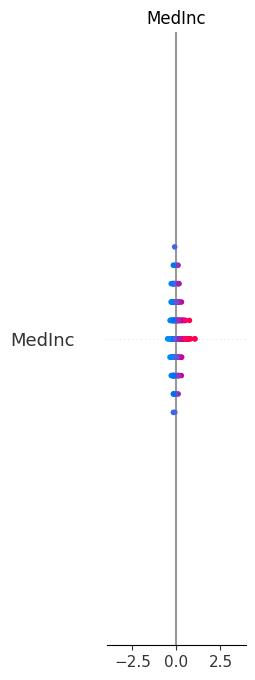

In [58]:
# Visualizing SHAP Values Using Summary Plot
shap.summary_plot(shap_values, to_explain, feature_names=X.columns)
